## FB Prophet Assignment by Group 5
<br>

In [ ]:
#We are working with the Churn data set 

# import required package
import pandas as pd

# read the csv churn data using the pandas package
churn = pd.read_csv("churn")
churn.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 22 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   State           3333 non-null   object 
 1   Account Length  3333 non-null   int64  
 2   Area Code       3333 non-null   int64  
 3   Phone           3333 non-null   object 
 4   Intl Plan       3333 non-null   object 
 5   VMail Plan      3333 non-null   object 
 6   VMail Message   3333 non-null   int64  
 7   Day Mins        3333 non-null   float64
 8   Day Calls       3333 non-null   int64  
 9   Day Charge      3333 non-null   float64
 10  Eve Mins        3333 non-null   float64
 11  Eve Calls       3333 non-null   int64  
 12  Eve Charge      3333 non-null   float64
 13  Night Mins      3333 non-null   float64
 14  Night Calls     3333 non-null   int64  
 15  Night Charge    3333 non-null   float64
 16  Intl Mins       3333 non-null   float64
 17  Intl Calls      3333 non-null   i

In [ ]:
churn.head()

,State,Account Length,Area Code,Phone,Intl Plan,VMail Plan,VMail Message,Day Mins,Day Calls,Day Charge,Eve Mins,Eve Calls,Eve Charge,Night Mins,Night Calls,Night Charge,Intl Mins,Intl Calls,Intl Charge,CustServ Calls,Old Churn,Churn
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False.,False
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False.,False
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False.,False
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False.,False
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False.,False


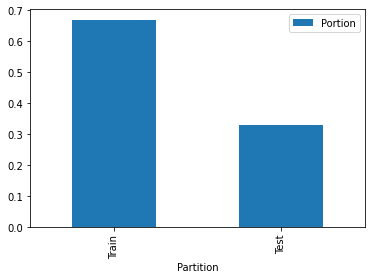

In [ ]:

#Question 3:  Partition the data set, so that 67% of the records are included in the training data set and
# 33% are included in the test data set.

# import required packages
from sklearn.model_selection import train_test_split
import random

# create partition
churn_train, churn_test = train_test_split(churn, test_size = 0.33, random_state = 7)

# collect proportion values in a dataframe 
df = pd.DataFrame({'Partition':['Train', 'Test'],
                   'Portion':[(churn_train.shape[0]/churn.shape[0]),
                              (churn_test.shape[0]/churn.shape[0])]
                   })
#Question 4 Use a bar graph to confirm your proportions. 
df.set_index('Partition').plot(kind='bar')


In [ ]:

# Question 5
# Identify the total number of records in the training data set and how many records in the training data set have a churn value of true.

print('The total number of records in the churn main dataset is :', churn.shape[0])  
print('The total number of records in the training dataset is :', churn_train.shape[0])
print('The total number of records in the test dataset is :', churn_test.shape[0])
print('The total number of records having Churn=True in training dataset is :', churn_train[churn_train['Churn'] == True]['Churn'].sum())


The total number of records in the churn main dataset is : 3333
The total number of records in the training dataset is : 2233
The total number of records in the test dataset is : 1100
The total number of records having Churn=True in training dataset is : 320


In [ ]:

# 6) Use your answers from the previous exercise to calculate how many true churn records
# you need to resample in order to have 20% of the rebalanced data set have true churn values.&
# 20% of total traning dataset is 0.2*2233=447 approximately. So we need 447-320=127 recs to be replaced with YES.
# create variables needed to compute resampled record size
# Question 6
churn_train_initial = churn_train[churn_train['Churn'] == True]['Churn'].sum()
churn_train_total = churn_train.shape[0]
churn_train_20percent = (0.20* churn_train_total - churn_train_initial) / 0.80
print('Churn_train with additional count to be converted as True is:', round(churn_train_20percent ))


Churn_train with additional count to be converted as True is: 158.0


In [ ]:
# 7) Perform the rebalancing described in the previous exercise and confirm that 20% of the
# records in the rebalanced data set have true churn values.
to_resample = churn_train.loc[churn_train['Churn'] == True]
our_resample = to_resample.sample(n=158, replace= True)
# Question 7
total_churn_records = pd.concat([churn_train, our_resample])
total_churn_records['Churn'].value_counts()

False    1913
True      478
Name: Churn, dtype: int64

In [ ]:
# Question 8
# Which baseline model do we use to compare our classification model performance against? 
# To which value does this baseline model assign all predictions? 
# What is the accuracy of this baseline model? 

# The baseline is determined by looking at Churn value of the greatest proportion of the data which is True.
# If a model were to predict False then the model would have an accuracy of 85% 
# Therefore the selected model would have to beat this baseline model. 

baseline_value = churn_train['Churn'].value_counts() / churn_train.shape[0]
print('The baseline is ',baseline_value)
print(churn_train['Day Mins'].sum())

The baseline is  False    0.856695
True     0.143305
Name: Churn, dtype: float64
401388.5


In [ ]:
# Question 9
# Validate your partition by testing for the difference in mean day minutes for the training set versus the test set.
from numpy import sqrt, abs, round
from scipy.stats import norm
from statistics import stdev

n1 = churn_train.shape[0]
x1 = churn_train['Day Mins'].mean()
sd1 = stdev(churn_train['Day Mins'])

n2 = churn_test.shape[0]
x2 = churn_test['Day Mins'].mean()
sd2 = stdev(churn_test['Day Mins'])

# calculate the denominator pooled standard error
pooledSE = sqrt(sd1**2/n1 + sd2**2/n2)

#calculate z value
z = round(((x1 - x2) - 0) /pooledSE,6)

# caluculate p-value
pval =  round(2*(1 - norm.cdf(abs(z))),6)

print('Z is ',z,'P value is ',pval)


Z is  -0.033201 P value is  0.973514


In [ ]:

# Because the p-value > than alpha 0.05 the null hypothesis H0 is accepted.
# Meaning that there is not evidence of significant differences between Min Calls in the train and test datasets 

# Question 10
# Validate your partition by testing for the difference in proportion of true churn records for the training set versus the test set.

n1 = churn_train.shape[0]
x1 = churn_train.loc[churn_train['Churn']==True].shape[0]
p1 = x1 / n1

n2 = churn_test.shape[0]
x2 = churn_test.loc[churn_test['Churn']== True].shape[0] 
p2 = x2 / n2

p = (x1+x2)/(n1+n2)

#calculate z value
z = round(((p1-p2)-0)/sqrt(p*(1-p)*(1/n1+1/n2)),6)

# caluculate p-value
pval =  round(2*(1 - norm.cdf(abs(z))),6)
print('Z is ',z,'P value is ',pval)



Z is  -0.376098 P value is  0.706844


In [ ]:

# Because the p-value > than alpha 0.05 the null hypothesis H0 is accepted.
# Meaning that there is not evidence of significant difference between True Churn records in the training and test datasets 
#